In [ ]:
#DE.2023/6437
#WARITIMI MICHAEL EBIMOBOWEI TEST1
# Loading the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('church_members_with_details.csv')

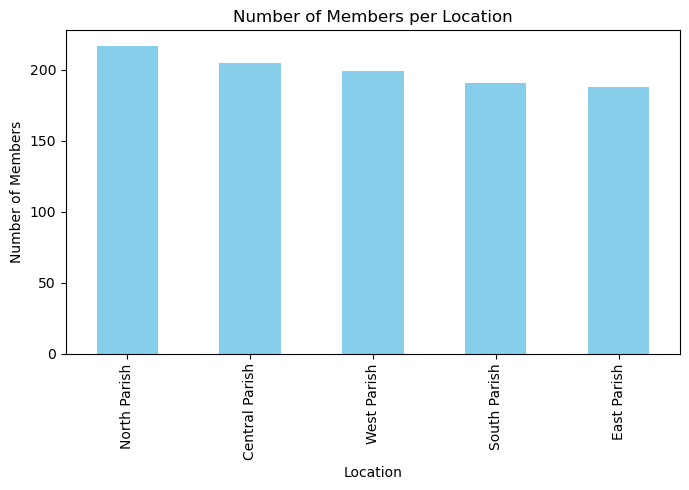

In [15]:
# A bar chart of members per location
plt.figure(figsize=(7,5))
df['Location'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Members per Location')
plt.xlabel('Location')
plt.ylabel('Number of Members')
plt.tight_layout()
plt.show()

Bar Chart: Number of Members per Location;

This chart shows the total number of church members in each location. Taller bars indicate locations with more members. You can quickly see which parish has the largest or smallest congregation.

Text(0, 0.5, '')

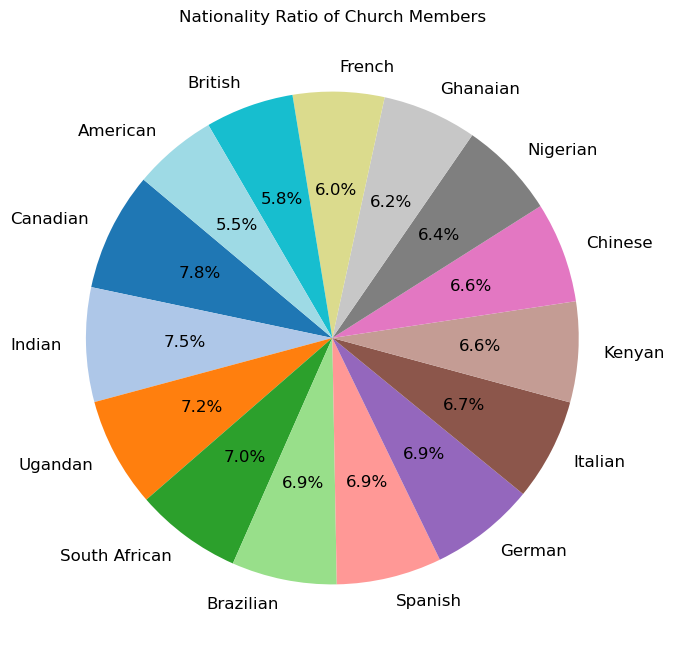

In [16]:
#pie chart for showing proportion of nationalities in the church
plt.figure(figsize=(8,8))
df['Nationality'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    cmap='tab20',
    textprops={'fontsize': 12}
)
plt.title('Nationality Ratio of Church Members')
plt.ylabel('')

Pie Chart: Proportion of Nationalities in the Church;

This pie chart displays the percentage of members from each nationality. Each slice represents a nationality, and the size of the slice shows its proportion in the church. It helps you understand the diversity of The congregation.



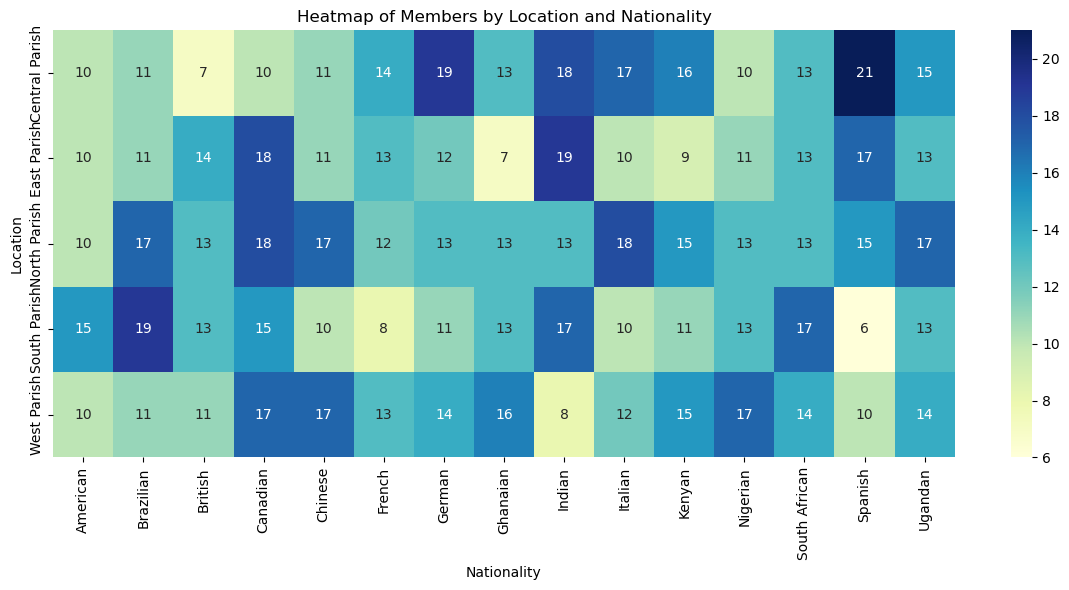

In [18]:
# Heatmap: Count of members by Location and Nationality

# Create a pivot table with counts
pivot = df.pivot_table(index='Location', columns='Nationality', values='ID', aggfunc='count', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Members by Location and Nationality')
plt.xlabel('Nationality')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

Heatmap: Count of Members by Location and Nationality;

The heatmap visualizes the number of members for each combination of location and nationality. Darker cells indicate higher counts. This chart helps you spot which nationalities are most common in each parish and where diversity is highest.

C:\Users\Wheezy\AppData\Local\Temp\ipykernel_11704\3281320131.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Age', data=df, palette='Set2')


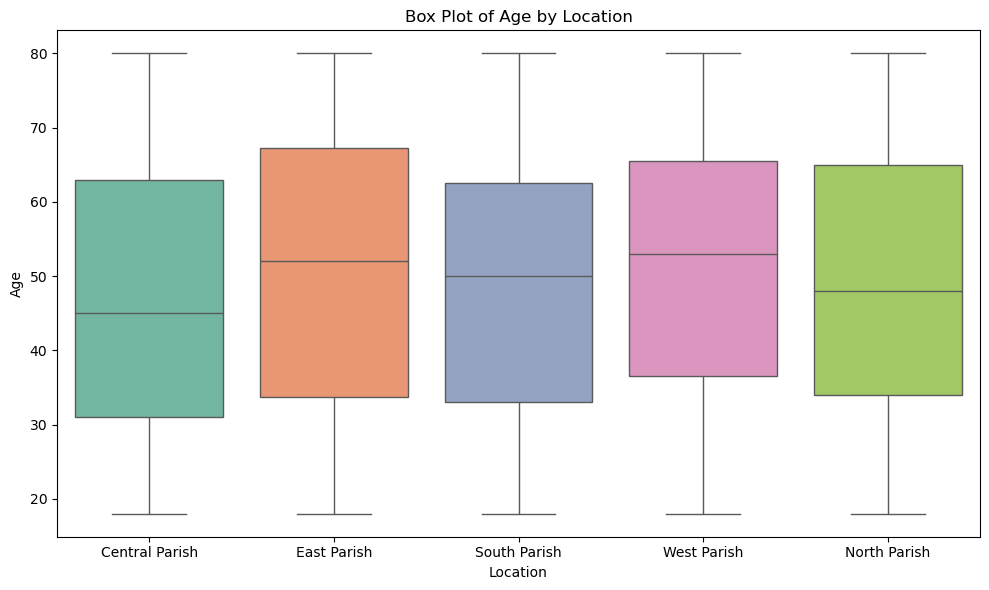

In [29]:
# Box plot: Age distribution by Location

plt.figure(figsize=(10,6))
sns.boxplot(x='Location', y='Age', data=df, palette='Set2')
plt.title('Box Plot of Age by Location')
plt.xlabel('Location')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


Box Plot: Age Distribution by Location;

The box plot summarizes the age distribution for each location. It shows the median age, the spread (quartiles), and any outliers. You can compare age profiles across parishes, identifying which locations have younger or older congregations.

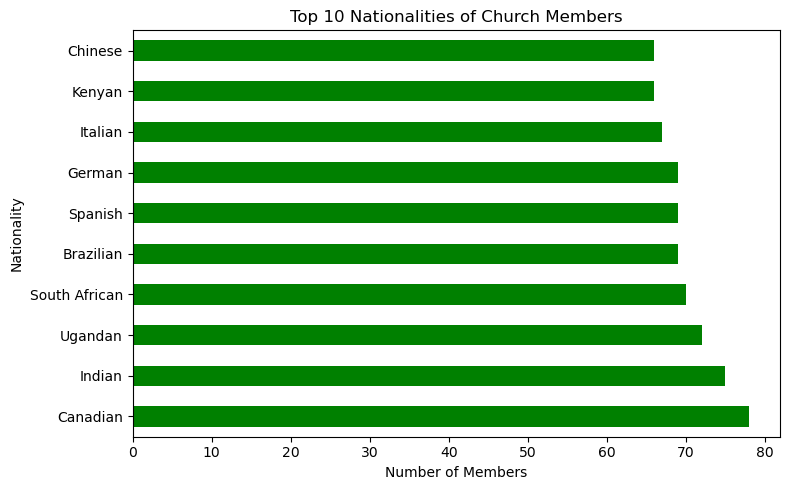

In [19]:
# Horizontal bar chart: Top 10 most common nationalities
plt.figure(figsize=(8,5))
df['Nationality'].value_counts().head(10).plot(kind='barh', color='green')
plt.title('Top 10 Nationalities of Church Members')
plt.xlabel('Number of Members')
plt.ylabel('Nationality')
plt.tight_layout()
plt.show()

Horizontal Bar Chart: Top 10 Most Common Nationalities;

This chart lists the ten most frequent nationalities among church members. Longer bars mean more members from that nationality. It’s useful for identifying the dominant nationalities in your church.

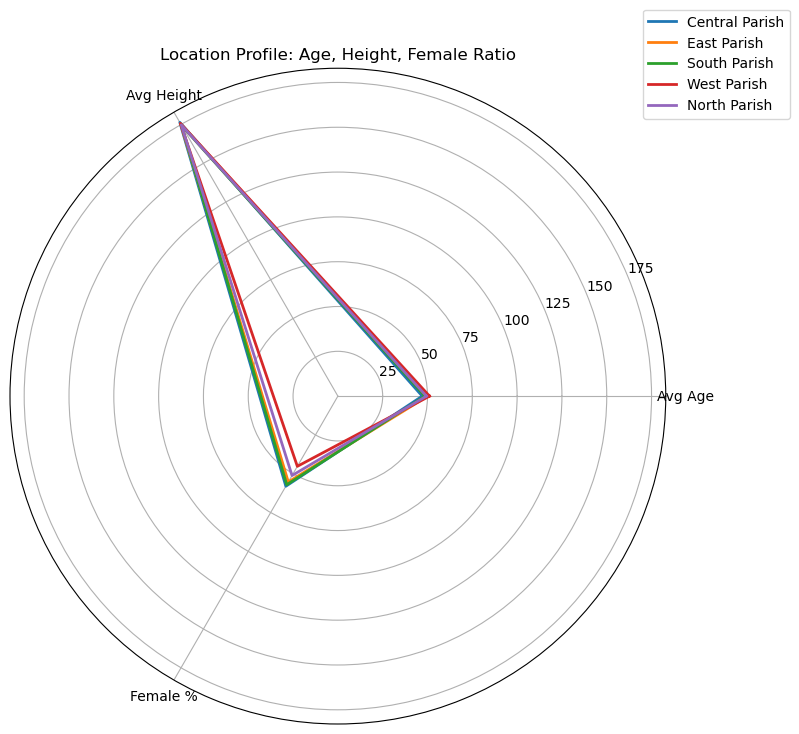

In [20]:
# Radar chart: Average Age, Height, and Gender Ratio per Location
locations = df['Location'].unique()
stats = []
for loc in locations:
    group = df[df['Location'] == loc]
    avg_age = group['Age'].mean()
    avg_height = group['Height_cm'].mean()
    gender_ratio = group['Gender'].value_counts(normalize=True).get('Female', 0) * 100
    stats.append([avg_age, avg_height, gender_ratio])

stats = np.array(stats)
labels = ['Avg Age', 'Avg Height', 'Female %']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
stats = np.concatenate((stats, stats[:,[0]]), axis=1)
angles += angles[:1]

plt.figure(figsize=(8,8))
for i, loc in enumerate(locations):
    plt.polar(angles, stats[i], label=loc, linewidth=2)
plt.xticks(angles[:-1], labels)
plt.title('Location Profile: Age, Height, Female Ratio')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

Radar Chart: Average Age, Height, and Female Ratio per Location;

The radar chart compares locations based on three metrics: average age, average height, and percentage of female members. Each location is a line on the chart, showing its profile across these dimensions. It helps you see how locations differ in demographics.

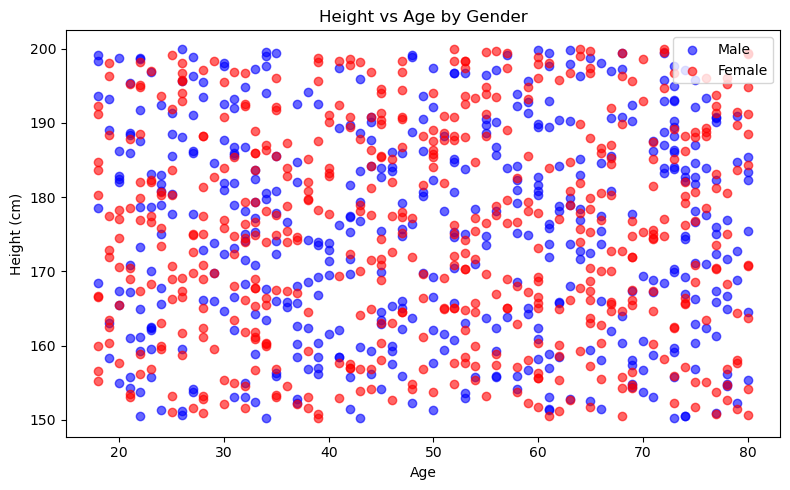

In [21]:
# Scatter plot: Height vs Age, colored by Gender
plt.figure(figsize=(8,5))
genders = {'Male': 'blue', 'Female': 'red'}
for gender, color in genders.items():
    subset = df[df['Gender'] == gender]
    plt.scatter(subset['Age'], subset['Height_cm'], c=color, label=gender, alpha=0.6)
plt.title('Height vs Age by Gender')
plt.xlabel('Age')
plt.ylabel('Height (cm)')
plt.legend()
plt.tight_layout()
plt.show()

Scatter Plot: Height vs Age by Gender;

This scatter plot shows the relationship between age and height, with points colored by gender. You can observe trends (e.g., whether younger members tend to be taller) and compare distributions between males and females.

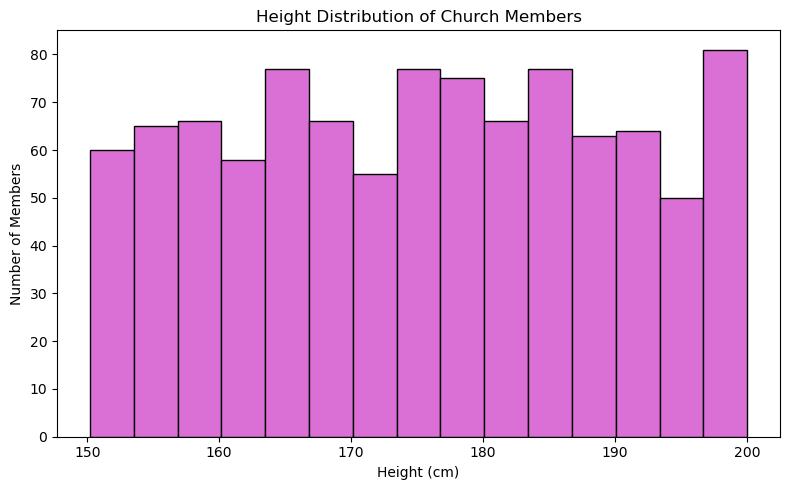

In [27]:
# Histogram: Height distribution of church members

plt.figure(figsize=(8,5))
plt.hist(df['Height_cm'], bins=15, color='orchid', edgecolor='black')
plt.title('Height Distribution of Church Members')
plt.xlabel('Height (cm)')
plt.ylabel('Number of Members')
plt.tight_layout()
plt.show()

Histogram: Height Distribution of Church Members;

The histogram displays how member heights are distributed. The x-axis shows height ranges, and the y-axis shows the number of members in each range. It helps you see if most members are within a certain height bracket or if there’s a wide spread.

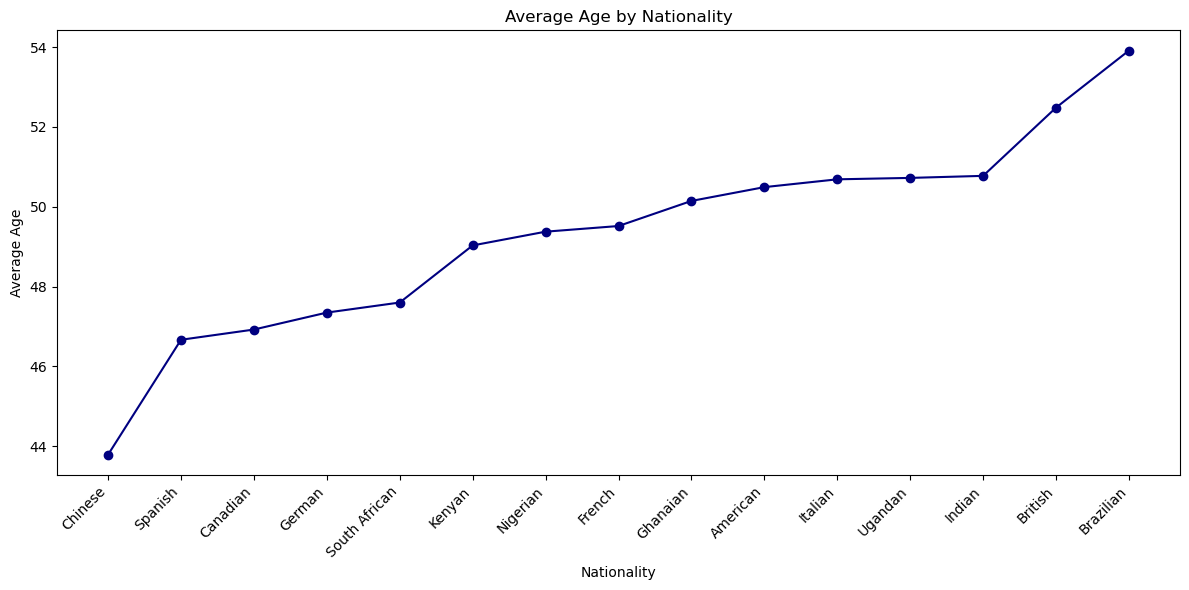

In [28]:
# Line chart: Average age by nationality

avg_age_by_nationality = df.groupby('Nationality')['Age'].mean().sort_values()
plt.figure(figsize=(12,6))
plt.plot(avg_age_by_nationality.index, avg_age_by_nationality.values, marker='o', linestyle='-', color='navy')
plt.title('Average Age by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Line Chart: Average Age by Nationality;

This line chart plots the average age for each nationality. It helps you compare age profiles across nationalities, showing which groups tend to be older or younger.